# Amazon Sales Project

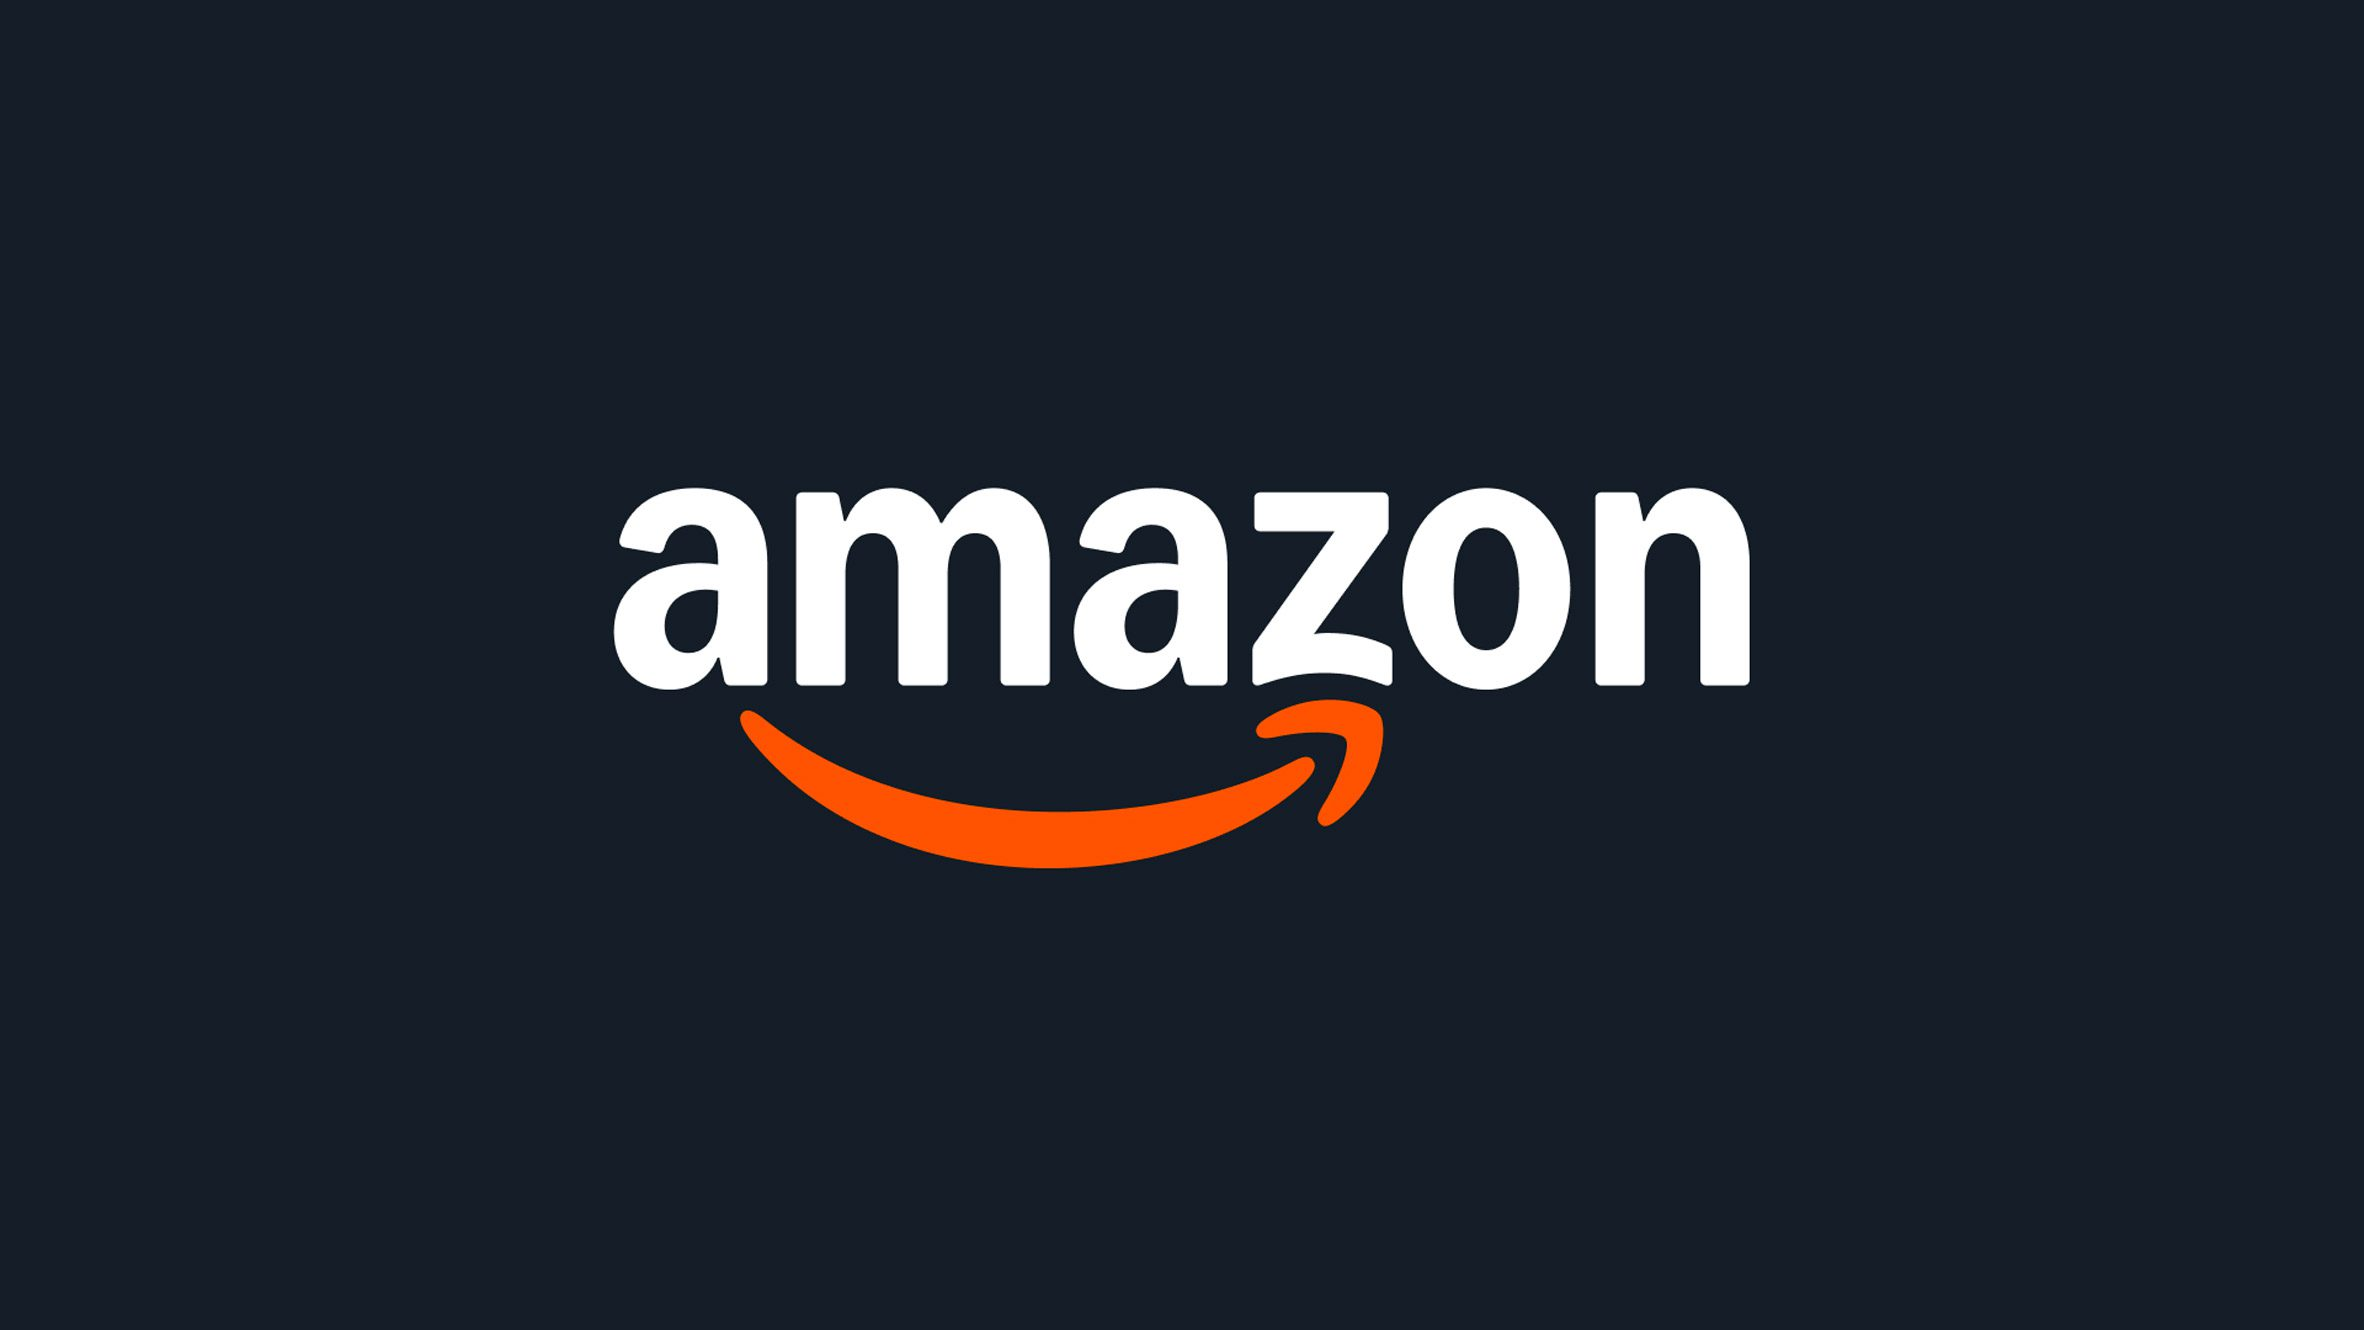

In [1]:
from IPython.display import Image, display

# Display the Project image 
display(Image(filename = 'datasets/amazon.jpg', width=500))

In [2]:
# Import the necessary library 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
# Upload the data 
amz = pd.read_csv('datasets/Amazon Sales Data.csv', index_col=0)
amz

,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Region,,,,,,,,,,,,,
Australia and Oceania,Japan,Clothes,Online,M,01/27/2012,382070886,02/19/2012,5689,337.55,280.64,1920321.95,1596560.96,323760.99
Asia,India,Snacks,Online,C,03/08/2023,921663901,03/28/2023,10029,177.86,115.08,1783757.94,1154137.32,629620.62
Middle East and North Africa,Germany,Personal Care,Online,H,11/08/2017,828008881,11/13/2017,7798,471.26,285.52,3674885.48,2226484.96,1448400.52
Asia,Japan,Household,Online,M,09/21/2014,500152036,10/04/2014,9192,350.15,275.32,3218578.80,2530741.44,687837.36
Central America and the Caribbean,Brazil,Meat,Online,L,05/21/2015,243206175,06/05/2015,1647,182.51,136.36,300593.97,224584.92,76009.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Asia,Australia,Snacks,Offline,M,06/21/2015,327080423,07/13/2015,4349,668.40,530.02,2906871.60,2305056.98,601814.62
North America,Germany,Snacks,Offline,C,07/09/2016,324887490,07/30/2016,7875,318.55,256.95,2508581.25,2023481.25,485100.00
Middle East and North Africa,UAE,Fruits,Offline,M,06/27/2019,442683461,07/10/2019,10556,650.53,423.62,6866994.68,4471732.72,2395261.96


In [4]:
# Shape of the datasets
amz.shape

(10000, 13)

In [5]:
# Display first few rows 
amz.head()

,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Region,,,,,,,,,,,,,
Australia and Oceania,Japan,Clothes,Online,M,01/27/2012,382070886,02/19/2012,5689,337.55,280.64,1920321.95,1596560.96,323760.99
Asia,India,Snacks,Online,C,03/08/2023,921663901,03/28/2023,10029,177.86,115.08,1783757.94,1154137.32,629620.62
Middle East and North Africa,Germany,Personal Care,Online,H,11/08/2017,828008881,11/13/2017,7798,471.26,285.52,3674885.48,2226484.96,1448400.52
Asia,Japan,Household,Online,M,09/21/2014,500152036,10/04/2014,9192,350.15,275.32,3218578.80,2530741.44,687837.36
Central America and the Caribbean,Brazil,Meat,Online,L,05/21/2015,243206175,06/05/2015,1647,182.51,136.36,300593.97,224584.92,76009.05


## Total Sales 

In [6]:
Total_Sales = round((amz['Total Revenue'].sum()/1000000),2)

print("Total Sales : $ {} M". format(Total_Sales)) 

Total Sales : $ 21357.63 M


## Total Cost 

In [7]:
Total_cost = round((amz['Total Cost'].sum()/1000000),2)

print("Total Cost : $ {} M".format(Total_cost))

Total Cost : $ 16058.14 M


## Total Profit

In [8]:
Total_profit = round((amz['Total Profit'].sum()/1000000),2)

print("Total Profit : $ {} M".format(Total_profit))

Total Profit : $ 5299.5 M


## Total units sold

In [9]:
Total_Units_sold = round((amz['Units Sold'].sum()),2)
print('Total Units Sold : {} '.format(Total_Units_sold))

Total Units Sold : 60616100 


## Total Orders Count

In [10]:
Total_order_count = amz['Order ID'].count()
print('Total Orders:',Total_order_count)

Total Orders: 10000


## Order Priority Wise Sales

In [11]:
# Using the dictionary to convert property codes to their corresponding names 

priority_abbr = { 'c': 'Critical' , 'H': 'High' , 'L': 'Low', 'M': 'Medium'}

In [12]:
# Grouping the order priority  and calculating the sum of total revenue  
Priority_wise = amz.groupby('Order Priority')['Total Revenue'].sum()

# Resetting the index to make order priority as a column 
Priority_wise = Priority_wise.reset_index()

# Mapping the priority codes to their corresponding names using the mapping dictionary 'Priority_abbr'
Priority_wise['Order Priority'] = Priority_wise['Order Priority'].map(priority_abbr)

# Converting the total revenue in million dollor 
Priority_wise['Total Revenue'] = round(Priority_wise['Total Revenue']/1000000,2)

# Rename the column name 
Priority_wise.rename(columns = {'Total Revenue': 'Total Sales(in Mill.)'}, inplace=True)

# Sorting values according to total sales in dscending order 
Priority_wise.sort_values(by = 'Total Sales(in Mill.)', ascending = False , inplace = True)

# Show the Values 
Priority_wise

,Order Priority,Total Sales(in Mill.)
3,Medium,5502.00
0,NaN,5340.15
2,Low,5264.24
1,High,5251.23


## Visualizing Order Priority Wise Sales.

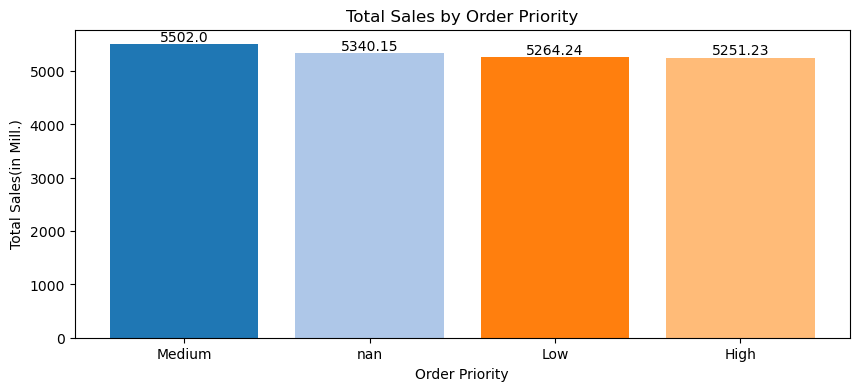

In [13]:
plt.figure(figsize=(10,4))
# Creating the bar plot to showing total sales accress order priority 
# x - axis order priority and y - axis total sales in(mill)
barplot = plt.bar(Priority_wise['Order Priority'].astype(str), Priority_wise['Total Sales(in Mill.)'], color=plt.cm.tab20.colors)

# Adding lables 
plt.bar_label(barplot, labels=Priority_wise['Total Sales(in Mill.)'], label_type="edge", color="black")    

# X label is order priority and y label is total sales in(mill)
plt.xlabel('Order Priority')
plt.ylabel('Total Sales(in Mill.)')
# The title of this visualize 
plt.title('Total Sales by Order Priority')

# Showing the plot 
plt.show()

## Order Priority Wise Order Count

In [14]:
# Grouping the order Priority and count the order id 
Priority_wise = amz.groupby('Order Priority')['Order ID'].count()

# resetting the index to make 'Order Priority' a column
Priority_wise = Priority_wise.reset_index()

# Using the priority_abbr for the priority code 
Priority_wise['Order Priority'] = Priority_wise['Order Priority'].map(priority_abbr)

# Renameing Order id to order count
Priority_wise.rename(columns={'Order ID' : 'Order Count'}, inplace=True)

# Order Count In descending 
Priority_wise.sort_values(by = 'Order Count', ascending=False, inplace =True)

Priority_wise



,Order Priority,Order Count
1,High,2553
2,Low,2516
3,Medium,2511
0,NaN,2420


## Visualizing Order Priority Wise Order Count

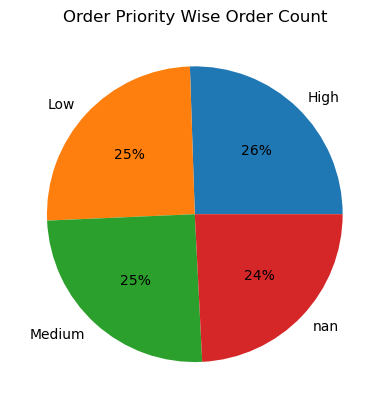

In [42]:
# Creating Pie Chart for the  order Priority Wise Order Count 
pieplot = plt.pie(Priority_wise['Order Count'], labels= Priority_wise['Order Priority'], autopct='%1.f%%', colors=plt.cm.tab10.colors)

plt.title('Order Priority Wise Order Count')

plt.show()

## Year Wise Sales 

In [16]:
# Converting Order date and ship date column in datetime format

amz['Order Date'] = pd.to_datetime(amz['Order Date'])
amz['Ship Date'] = pd.to_datetime(amz['Ship Date'])


In [17]:
# Grouping the dataframe by year from order date and summing the total revenu column 
year_wise_sales = amz.groupby(amz['Order Date'].dt.year)['Total Revenue'].sum()

# Reseting the index to converting the resulting series to a dataframe 
year_wise_sales = year_wise_sales.reset_index()

# Converting total revenue in million dollars 
year_wise_sales['Total Revenue'] = round(year_wise_sales['Total Revenue']/1000000,2)

# Rename the column total revenue to total sales in(mill)
year_wise_sales.rename(columns={'Total Revenue' : 'Total Sales in(mill)', 'Order Date' : 'Year'}, inplace=True)

# Display the resulting data frame 
year_wise_sales

,Year,Total Sales in(mill)
0,2010,1521.95
1,2011,1541.51
2,2012,1675.40
3,2013,1580.32
4,2014,1549.51
5,2015,1586.46
6,2016,1598.34
7,2017,1512.10
8,2018,1487.36
9,2019,1540.74


## Visualizing Year Wise Sales 

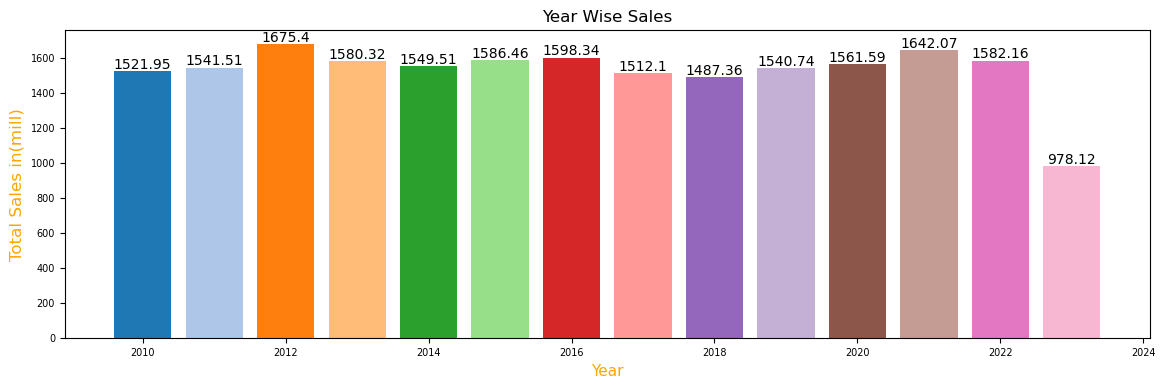

In [18]:
# Creating the barPlot
plt.figure(figsize=(14,4))
barplot = plt.bar(year_wise_sales['Year'], year_wise_sales['Total Sales in(mill)'], color = plt.cm.tab20.colors)

plt.bar_label(barplot, labels=year_wise_sales['Total Sales in(mill)'], label_type='edge', color='black', fontsize = 10)

plt.xlabel('Year', color='orange', size = 11)
plt.ylabel('Total Sales in(mill)', color='orange', size=12)
plt.title('Year Wise Sales')

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.show()

## Month Wise Sales 

In [19]:
Month_wise_sales = amz.groupby(amz['Order Date'].dt.month)['Total Revenue'].sum()

Month_wise_sales = Month_wise_sales.reset_index()

Month_wise_sales['Total Revenue'] = round(Month_wise_sales['Total Revenue']/1000000,1)

Month_wise_sales.rename(columns={'Total Revenue' : 'Total Sales in(mill)', 'Order Date' : 'month'}, inplace=True)


Month_wise_sales

,month,Total Sales in(mill)
0,1,1848.1
1,2,1697.3
2,3,1968.8
3,4,1627.3
4,5,1840.2
5,6,1715.1
6,7,1913.9
7,8,1775.9
8,9,1761.6
9,10,1764.8


## Visualizing Month Wise Sales 

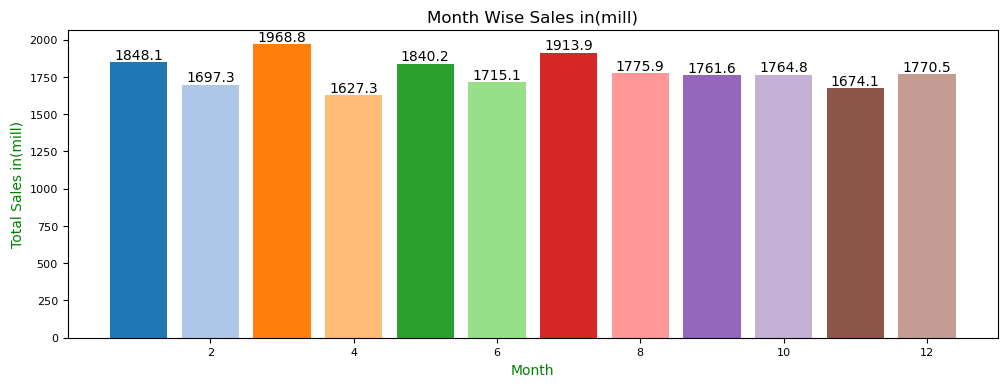

In [20]:
plt.figure(figsize=(12,4))
# Using bar chart
barplot = plt.bar(Month_wise_sales['month'], Month_wise_sales['Total Sales in(mill)'], color = plt.cm.tab20.colors)

plt.bar_label(barplot, labels=Month_wise_sales['Total Sales in(mill)'], label_type='edge', color='black', fontsize = 10)

plt.xlabel('Month',color='Green')
plt.ylabel('Total Sales in(mill)', color='Green')
plt.title('Month Wise Sales in(mill)')

plt.xticks( fontsize = 8, color='black')
plt.yticks(fontsize=8)

plt.show()

 ## Region Wise Total Profit

In [21]:
# Grouping the data using the 'Region' 
Region_wise_Profit = amz.groupby('Region')['Total Profit'].sum()

# Now Make region a column again
Region_wise_Profit=Region_wise_Profit.reset_index()

# Sorthng the dataframe using the total profit in descending order
Region_wise_Profit.sort_values(by='Total Profit' , ascending= False, inplace=True )

Region_wise_Profit['Total Profit'] = Region_wise_Profit['Total Profit'].apply(lambda x : f"{x/1000000:.2f} " )

Region_wise_Profit


,Region,Total Profit
1,Australia and Oceania,785.06
4,Middle East and North Africa,775.73
5,North America,754.42
2,Central America and the Caribbean,753.27
0,Asia,752.10
3,Europe,741.90
6,Sub-Saharan Africa,737.02


## Visualizing Region Wise Total Profit

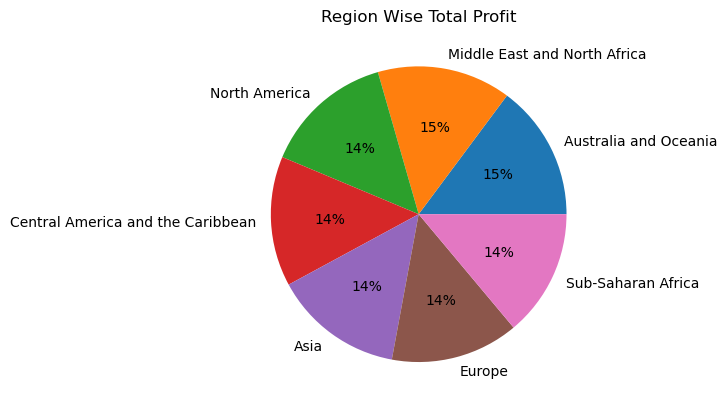

In [22]:
# # Creating Pie Chart 
pieplot = plt.pie(Region_wise_Profit['Total Profit'], labels= Region_wise_Profit['Region'], autopct='%1.f%%', colors=plt.cm.tab10.colors)

plt.title('Region Wise Total Profit')

plt.show()



## Region Wise Sales 

In [23]:
# Grouping the region and calculation the total revenue 
Region_wise_Profit = amz.groupby('Region')['Total Revenue'].sum()

Region_wise_Profit = Region_wise_Profit.reset_index()

Region_wise_Profit.sort_values(by = 'Total Revenue', ascending=False, inplace=True)

Region_wise_Profit['Total Revenue'] = Region_wise_Profit['Total Revenue'].apply (lambda x:x /1000000).round(2)

Region_wise_Profit.rename(columns={'Total Revenue' :'Total Sales in(mill)'}, inplace = True)

Region_wise_Profit

,Region,Total Sales in(mill)
1,Australia and Oceania,3142.22
4,Middle East and North Africa,3103.36
5,North America,3033.95
2,Central America and the Caribbean,3028.94
3,Europe,3026.74
6,Sub-Saharan Africa,3017.30
0,Asia,3005.12


## Visualizeing Resion Wise Sales

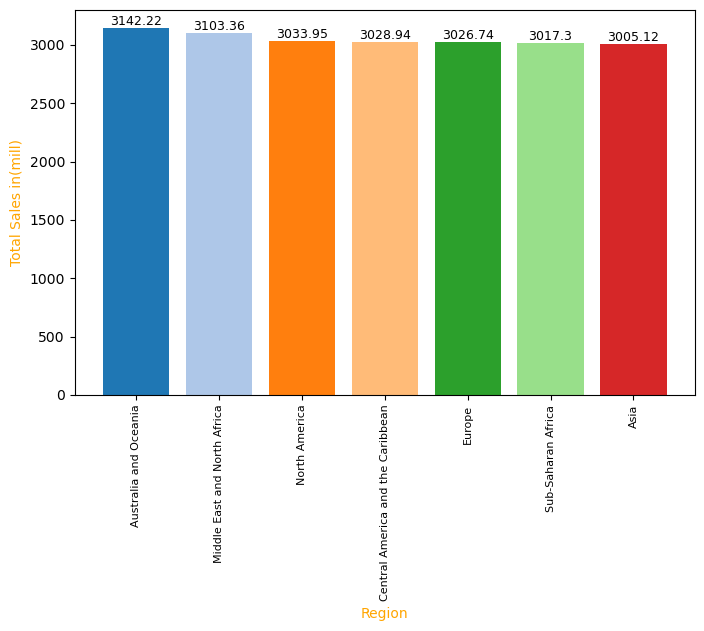

In [24]:
plt.figure(figsize=(8,5))

barplot = plt.bar(Region_wise_Profit['Region'], Region_wise_Profit['Total Sales in(mill)'], color = plt.cm.tab20.colors)

# Adding labels to the bars with the total sales values, positioning the labels at the edge of the bars
plt.bar_label(barplot, labels = Region_wise_Profit['Total Sales in(mill)'], label_type='edge', color='black', fontsize = 9)

plt.xlabel('Region', color='orange')

plt.ylabel('Total Sales in(mill)',color='orange')

plt.xticks(rotation = 90 , size = 8)
plt.yticks(fontsize=10)

plt.show()




## Region WIse Sales , Profit & Profit Margin

In [25]:
# Group by 'Region' and calculate the Total Revenue
Region_wise_sales_profit = amz.groupby('Region')[['Total Revenue','Total Profit']].sum()

Region_wise_sales_profit = Region_wise_sales_profit.reset_index()

# Calculating the Profit Margin
Region_wise_sales_profit['Profit Margin'] = (Region_wise_sales_profit['Total Profit']/ Region_wise_sales_profit['Total Revenue']).round(2)

# Sort values base on profit margin
Region_wise_sales_profit.sort_values(by = 'Profit Margin', ascending= False, inplace=True)

# Total Revenue to display mill with doller sign
Region_wise_sales_profit['Total Revenue'] = Region_wise_sales_profit['Total Revenue'].apply (lambda x: f" $ { x/1000000:.2f} M")

# Now Total Profit to dispaly mill with doller sign 
Region_wise_sales_profit['Total Profit'] = Region_wise_sales_profit['Total Profit'].apply(lambda x: f" $ { x/1000000:2f} M")

Region_wise_sales_profit


,Region,Total Revenue,Total Profit,Profit Margin
0,Asia,$ 3005.12 M,$ 752.099763 M,0.25
1,Australia and Oceania,$ 3142.22 M,$ 785.059010 M,0.25
2,Central America and the Caribbean,$ 3028.94 M,$ 753.272016 M,0.25
3,Europe,$ 3026.74 M,$ 741.898074 M,0.25
4,Middle East and North Africa,$ 3103.36 M,$ 775.725085 M,0.25
5,North America,$ 3033.95 M,$ 754.419278 M,0.25
6,Sub-Saharan Africa,$ 3017.30 M,$ 737.022066 M,0.24


## Visualizing Region Wise  Profit Margin 

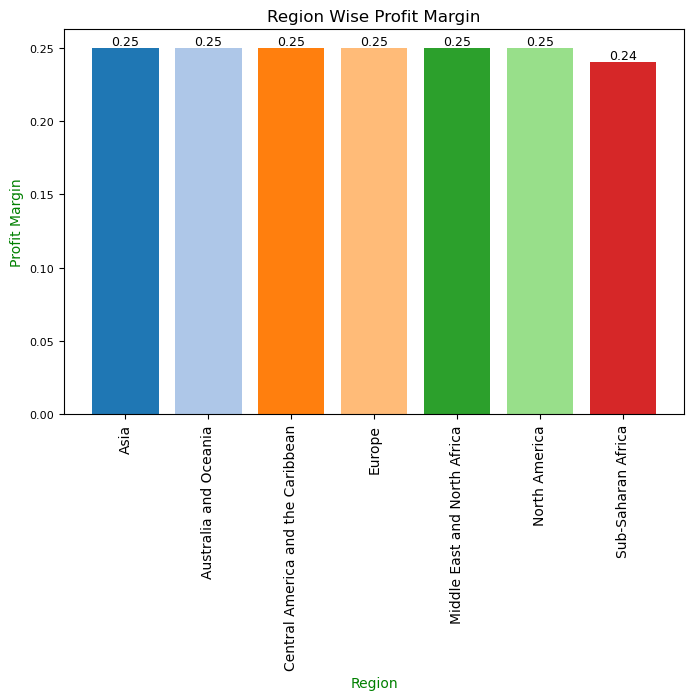

In [26]:
# Creating a bar plot to showing top 10 Countries for Profit margin 
plt.figure(figsize=(8,5))

Region_wise_sales_margin = Region_wise_sales_profit[[ 'Region', 'Profit Margin']]

# Creating bar chart 
Region_Profit_margin = plt.bar(Region_wise_sales_margin['Region'], Region_wise_sales_margin['Profit Margin'], color = plt.cm.tab20.colors)

# Adding Data Lables 
plt.bar_label(Region_Profit_margin, labels = Region_wise_sales_margin['Profit Margin'], label_type = 'edge', color='black', fontsize= 9)

plt.xlabel('Region', color='green')
plt.ylabel('Profit Margin', color='green')
plt.title('Region Wise Profit Margin')

plt.xticks(rotation = 90, size = 10)
plt.yticks(fontsize= 8)

plt.show()



## Order Date Wise Total Profit

In [27]:
# Grouping order date and summing total profit
Order_Date_wise = amz.groupby('Order Date', as_index=False)['Total Profit'].sum()

# Convert to million (numeric)
Order_Date_wise['Total Profit in(mill)'] = Order_Date_wise['Total Profit'] / 1_000_000

# Sort FIRST (numeric sorting)
Order_Date_wise = Order_Date_wise.sort_values( by='Total Profit in(mill)', ascending=False)

# OPTIONAL: formatted column only for display
Order_Date_wise['Profit Label'] = Order_Date_wise['Total Profit in(mill)'].apply( lambda x: f"$ {x:.2f} M")

Order_Date_wise.head(10)


,Order Date,Total Profit,Total Profit in(mill),Profit Label
934,2012-12-16,6591729.81,6.591730,$ 6.59 M
1263,2013-12-25,6172296.11,6.172296,$ 6.17 M
544,2011-09-19,6035466.27,6.035466,$ 6.04 M
1633,2015-03-02,6014725.02,6.014725,$ 6.01 M
1955,2016-03-01,5992539.98,5.992540,$ 5.99 M
2800,2018-10-30,5899323.35,5.899323,$ 5.90 M
3971,2022-07-17,5838235.09,5.838235,$ 5.84 M
4015,2022-09-02,5768886.97,5.768887,$ 5.77 M
2356,2017-06-02,5582607.07,5.582607,$ 5.58 M
333,2011-01-20,5574045.17,5.574045,$ 5.57 M


## Visualizing Order Date Wise Total Profit

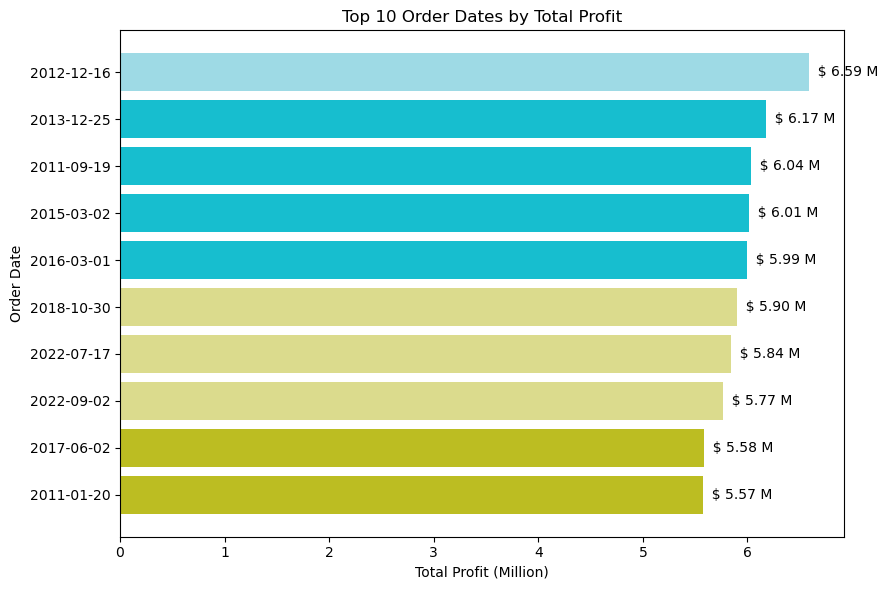

In [28]:
#  Top 10 Order Dates To perform best in total Profit  
top10 = Order_Date_wise.head(10)

plt.figure(figsize=(9,6))

bars = plt.barh(
    top10['Order Date'].astype(str), top10['Total Profit in(mill)'], color=plt.cm.tab20(top10['Total Profit in(mill)'] / top10['Total Profit in(mill)'].max())
)

# Add value labels at the end
for bar, label in zip(bars, top10['Profit Label']):
    plt.text( bar.get_width(), bar.get_y() + bar.get_height()/2, f'  {label}', va='center', fontsize=10,color='black')

plt.xlabel('Total Profit (Million)')
plt.ylabel('Order Date')
plt.title('Top 10 Order Dates by Total Profit')

plt.gca().invert_yaxis()   # Highest value on top
plt.tight_layout()
plt.show()


## Creating a Column Delivery Time

In [29]:
# Calculating Delivery time

# Substacting order date from the ship date to calculate delivery time 
amz['Delivery time'] = amz['Ship Date'] - amz['Order Date']
amz.head(3)


,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Delivery time
Region,,,,,,,,,,,,,,
Australia and Oceania,Japan,Clothes,Online,M,2012-01-27,382070886,2012-02-19,5689,337.55,280.64,1920321.95,1596560.96,323760.99,23 days
Asia,India,Snacks,Online,C,2023-03-08,921663901,2023-03-28,10029,177.86,115.08,1783757.94,1154137.32,629620.62,20 days
Middle East and North Africa,Germany,Personal Care,Online,H,2017-11-08,828008881,2017-11-13,7798,471.26,285.52,3674885.48,2226484.96,1448400.52,5 days


## Region Wise Average Delivery Time

In [30]:
# Calculating average delivery time per region 

# Grouping the region 
Average_Delivery_Days = amz.groupby('Region')['Delivery time'].mean()

Average_Delivery_Days = Average_Delivery_Days.reset_index()

Average_Delivery_Days.sort_values( by = 'Delivery time', ascending= True,inplace=True)

# Converting delivery time from timedelta to days and rounding off to two decimal places
Average_Delivery_Days['Delivery time'] = Average_Delivery_Days['Delivery time'].apply(lambda x: x.total_seconds () / 86400).round(2)

# Renaming the column name 
Average_Delivery_Days.rename(columns = {'Delivery time' : 'Ave_Del_time in(Days)'}, inplace= True)

Average_Delivery_Days

,Region,Ave_Del_time in(Days)
6,Sub-Saharan Africa,15.22
2,Central America and the Caribbean,15.22
5,North America,15.31
3,Europe,15.42
4,Middle East and North Africa,15.47
0,Asia,15.56
1,Australia and Oceania,15.62


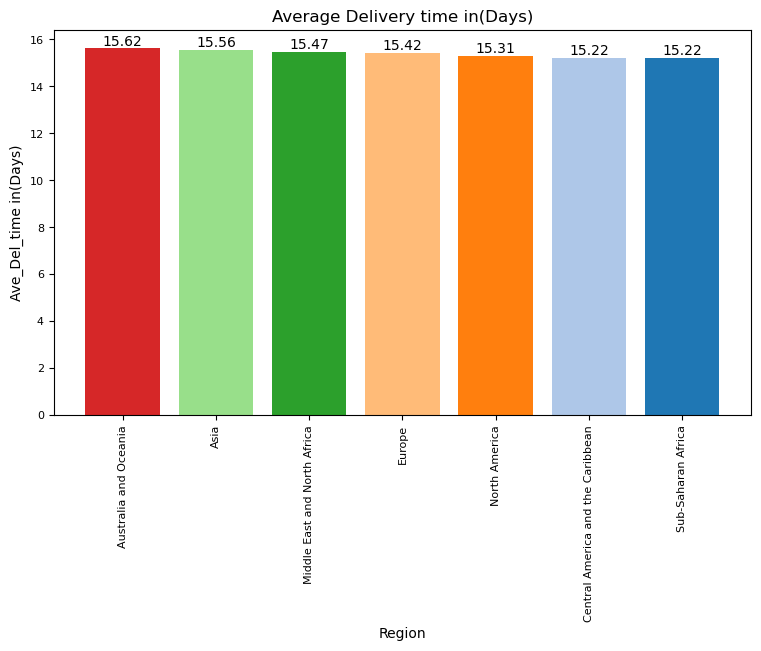

In [31]:
# Creating bar plot for average delivery days
plt.figure(figsize=(9,5))

barplot = plt.bar(Average_Delivery_Days['Region'], Average_Delivery_Days['Ave_Del_time in(Days)'], color=plt.cm.tab20.colors[:len(Average_Delivery_Days)])

plt.bar_label(barplot, labels=Average_Delivery_Days['Ave_Del_time in(Days)'], label_type='edge', color='black', fontsize = 10)

plt.xlabel('Region')
plt.ylabel('Ave_Del_time in(Days)')
plt.title('Average Delivery time in(Days)')

plt.xticks(rotation=90, size = 8)
plt.yticks(fontsize=8)
plt.gca().invert_xaxis()

plt.show()

## Country Wise Sales, Profit & Profit Margin 

In [32]:
Country_Wise_Sales_Profit = amz.groupby('Country')[['Total Revenue' , 'Total Profit']].sum()

Country_Wise_Sales_Profit = Country_Wise_Sales_Profit.reset_index()

Country_Wise_Sales_Profit['Profit Margin'] = (Country_Wise_Sales_Profit['Total Revenue'] / Country_Wise_Sales_Profit['Total Profit']).round(2)

Country_Wise_Sales_Profit.sort_values(by = 'Profit Margin', ascending=False, inplace=True)

Country_Wise_Sales_Profit['Total Revenue'] = Country_Wise_Sales_Profit['Total Profit'].apply(lambda x: f"$ { x/1000000:.2f} M")

Country_Wise_Sales_Profit['Total Profit'] =Country_Wise_Sales_Profit['Total Profit'].apply(lambda x: f"$ { x/1000000:.2f} M")

Country_Wise_Sales_Profit.head(10)


,Country,Total Revenue,Total Profit,Profit Margin
0,Australia,$ 534.61 M,$ 534.61 M,4.10
8,UAE,$ 520.03 M,$ 520.03 M,4.07
4,India,$ 513.36 M,$ 513.36 M,4.06
3,Germany,$ 532.41 M,$ 532.41 M,4.05
1,Brazil,$ 529.13 M,$ 529.13 M,4.03
5,Japan,$ 517.82 M,$ 517.82 M,4.03
9,USA,$ 546.78 M,$ 546.78 M,4.01
6,Kenya,$ 525.89 M,$ 525.89 M,4.00
2,France,$ 536.09 M,$ 536.09 M,3.98
7,Mexico,$ 543.38 M,$ 543.38 M,3.98


## Profit Margin Wise top 10 Country

In [33]:
# Creating a new dataframe with only country and profit margin columns 
Country_Profit_Margin = Country_Wise_Sales_Profit[['Country','Profit Margin']].head(10)
Country_Profit_Margin

,Country,Profit Margin
0,Australia,4.10
8,UAE,4.07
4,India,4.06
3,Germany,4.05
1,Brazil,4.03
5,Japan,4.03
9,USA,4.01
6,Kenya,4.00
2,France,3.98
7,Mexico,3.98


## Visualizing Profit Margin Wise top 10 Country

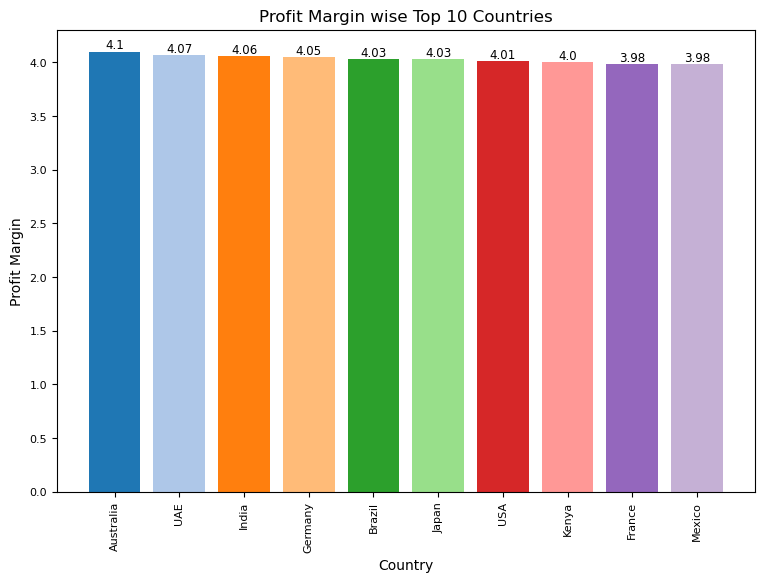

In [34]:
# Creating a bar plot for profit margin of top 10 countries

plt.figure(figsize=(9, 6))

# Creating the bar plot
country_profit_bar = plt.bar(Country_Profit_Margin['Country'], Country_Profit_Margin['Profit Margin'], color=plt.cm.tab20.colors)

# Adding data labels to the bars
plt.bar_label(country_profit_bar, labels=Country_Profit_Margin['Profit Margin'], label_type='edge', color="black", fontsize=8.5)    

# Adding labels and title to the plot
plt.xlabel('Country')
plt.ylabel('Profit Margin')
plt.title('Profit Margin wise Top 10 Countries')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90, size=8)
plt.yticks(fontsize=8)

# Displaying the plot
plt.show()


## Profit Margin Wise Bottom 10 Countries 

In [35]:
# Creating a new Data frame for country and profit margin 
Country_Profit_Margin = Country_Profit_Margin[['Country' , 'Profit Margin']].tail(10)

Country_Profit_Margin

,Country,Profit Margin
0,Australia,4.10
8,UAE,4.07
4,India,4.06
3,Germany,4.05
1,Brazil,4.03
5,Japan,4.03
9,USA,4.01
6,Kenya,4.00
2,France,3.98
7,Mexico,3.98
